In [1]:
# Generate NCI reports for given projects
import os
import sys

user_id = os.environ['USER']

# Insert your local paths here
sys.path.append(f'/home/548/{user_id}/code/nci_resource_tools')
sys.path.append(f'/home/548/{user_id}/code/nci-tools/src/ncitools')


In [78]:
import pandas as pd
import subprocess 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display
import datetime as dt

from nci_account import nci_account
from nci_resource_tools.read_project import retrieve_project_data, create_storage_df
from config import *

In [3]:
COE_PROJECTS

['gb02', 'fy29', 'if69', 'ng72', 'su28']

In [4]:
SU_df_dict, grant_dict, storage_dict = retrieve_project_data()

Text(0.5, 0.98, 'SU usage as of Wednesday April 2025')

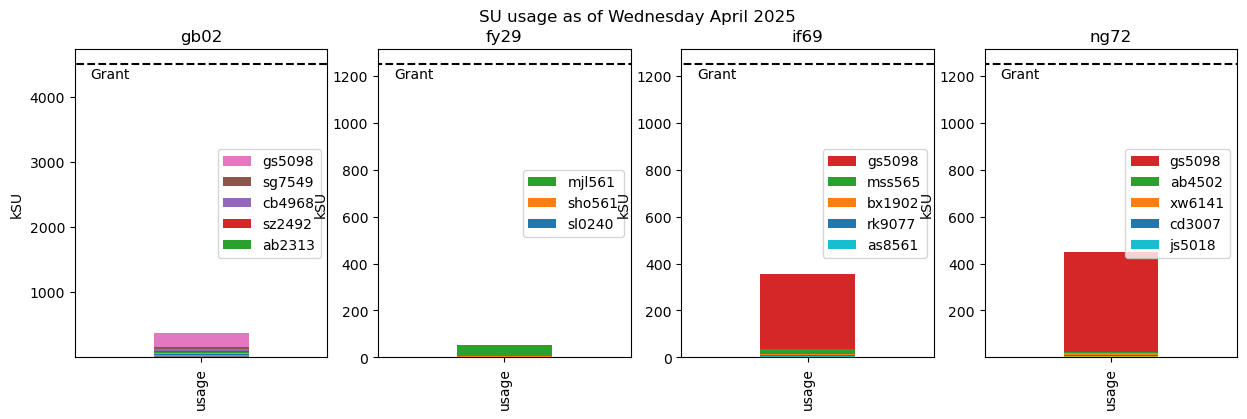

In [90]:
# Plot kSUs for every project
fig,axes = plt.subplots(1,len(grant_dict),figsize=(15,4))

USER_NAMES = 5  #Plot the top five usernames of SU usage

for i,project in enumerate(grant_dict.keys()):
    
    SU_df_dict[project]['usage'].sort_values(ascending=True).to_frame().T.plot.bar(stacked=True,ax=axes[i],width=0.3)
    patches, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles=patches[-USER_NAMES:][::-1],labels=labels[-USER_NAMES:][::-1],loc=7)
    axes[i].hlines(grant_dict[project],-5,5,linestyles='dashed',color='black')
    axes[i].annotate('Grant',(-0.35,0.95*grant_dict[project]))
    axes[i].yaxis.set_label_text('kSU')
    axes[i].set_title(project)

fig.suptitle(f"SU usage as of {dt.datetime.today().strftime('%A %B %Y')}")

In [6]:
storage_data = create_storage_df(storage_dict)

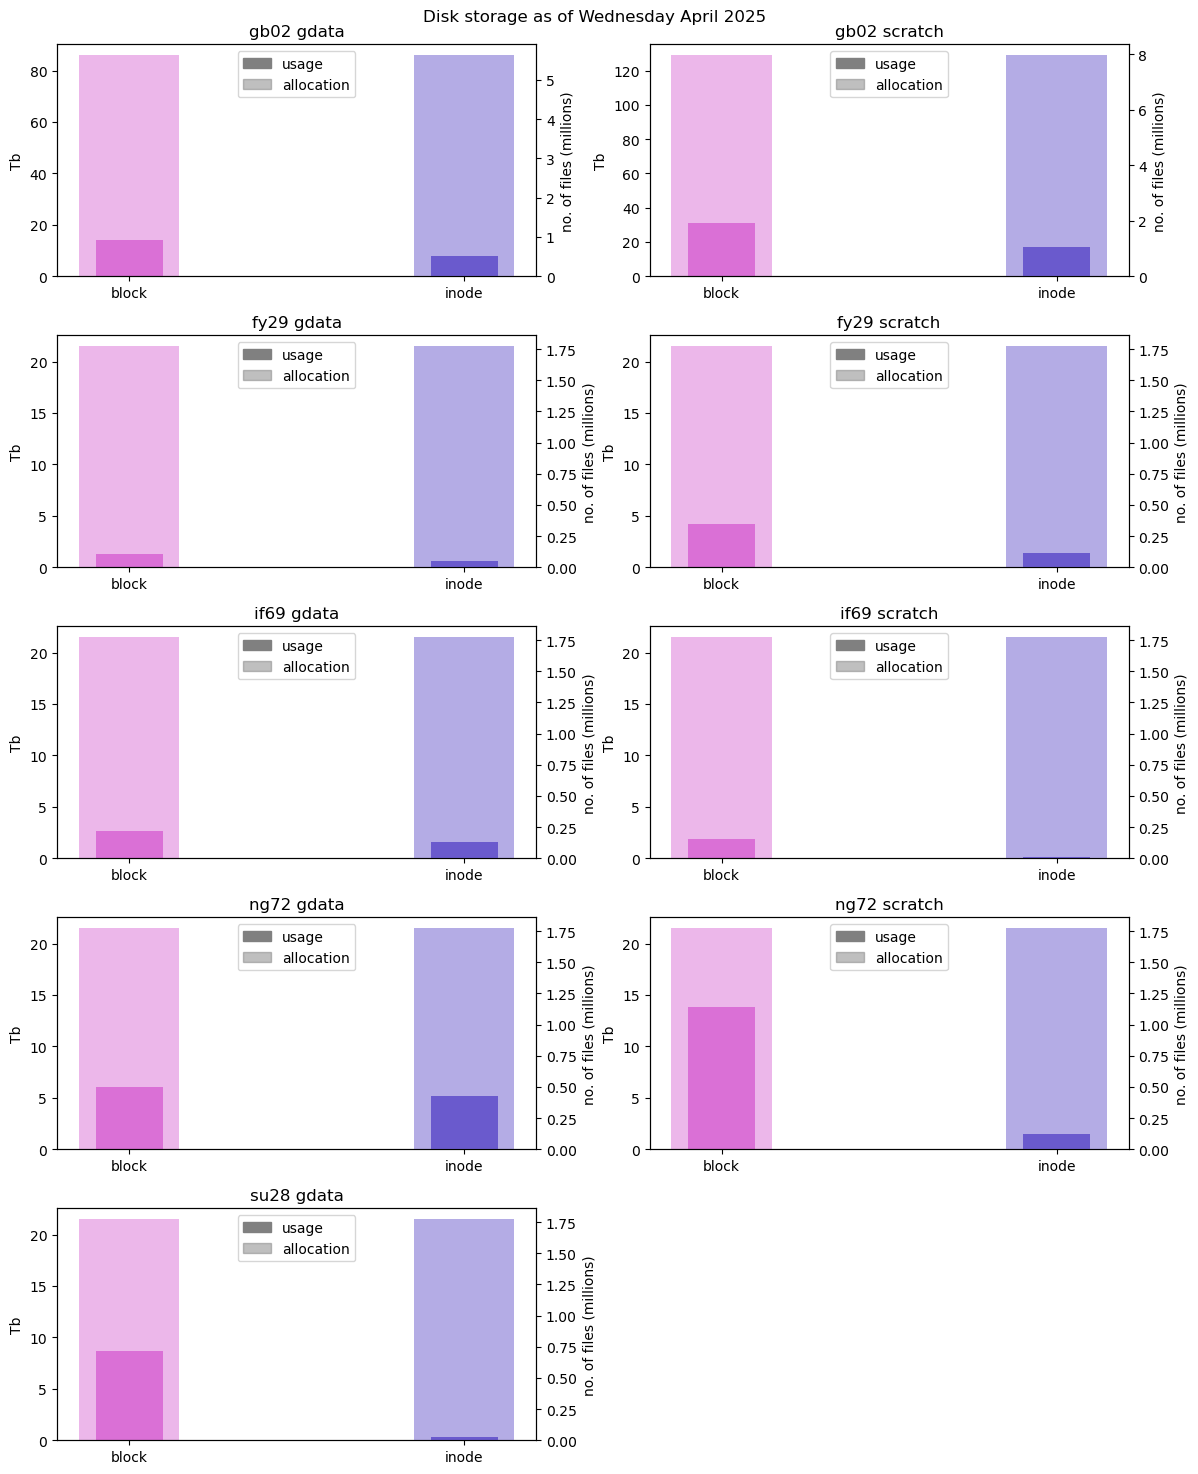

In [87]:
num_columns=2
num_rows = len(COE_PROJECTS)    
num_plots = sum(len(v) for v in storage_dict.values())
    
Position = range(1,num_plots+1)

fig_height = num_rows*3
fig_width = 12

fig = plt.figure(figsize=(fig_width,fig_height))
k = 0

for project in COE_PROJECTS:
    for disk in storage_data[project].keys():

        ax = fig.add_subplot(num_rows, num_columns, Position[k])
        ax.bar(x=['block'],height=storage_data[project][disk]['usage'].loc['block'],width=0.2,label='usage',color='orchid')
        ax.bar(x=['block'],height=storage_data[project][disk]['allocation'].loc['block'],alpha=0.5,width=0.3,label='allocation',color='orchid')
        ax2=ax.twinx()
        ax2.bar(x=['inode'],height=storage_data[project][disk]['usage'].loc['inode'],width=0.2,label='usage',color='slateblue')
        ax2.bar(x=['inode'],height=storage_data[project][disk]['allocation'].loc['inode'],alpha=0.5,width=0.3,color='slateblue',label='allocation')
        ax.yaxis.set_label_text('Tb')
        ax2.yaxis.set_label_text('no. of files (millions)')
        
        usage_patch=mpatches.Patch(color='grey',label='usage')
        alloc_patch=mpatches.Patch(color='grey',alpha=0.5,label='allocation')
        ax.legend(handles=[usage_patch,alloc_patch],loc=9)
        ax.set_title(f'{project} {disk}')

        k+= 1

fig.suptitle(f"Disk storage as of {dt.datetime.today().strftime('%A %B %Y')}")
plt.tight_layout()

In [86]:
# Find the largest individual users (this takes a while)
du_dict = {}

for project in COE_PROJECTS:
    command = f'du -s /g/data/{project}/* | sort -h'
    print (f' INFO : Executing {command}')
    output_numeric = subprocess.run(command, capture_output=True, shell=True)
    c=output_numeric.stdout.decode('utf-8').splitlines()
    
    # Split the output and create a dictionary
    d = {}
    for x in c:
        d[x.split('/')[-1]] = x.split('\t')[0]
    
    du_dict[project] = d

 INFO : Executing du -s /g/data/gb02/* | sort -h
 INFO : Executing du -s /g/data/fy29/* | sort -h
 INFO : Executing du -s /g/data/if69/* | sort -h
 INFO : Executing du -s /g/data/ng72/* | sort -h
 INFO : Executing du -s /g/data/su28/* | sort -h


In [38]:
user_storage_numeric=pd.DataFrame.from_dict(du_dict)

Index(['gb02', 'fy29', 'if69', 'ng72', 'su28'], dtype='object')

In [75]:
# Show top 10 users in tabular form convert to Tb.
NUM_USERS=10
for project in COE_PROJECTS:
    print (f'Top {NUM_USERS} users for /g/data space for {project} in Tb')
    display((user_storage_numeric[project].to_frame().dropna().astype('int').sort_values(project)/1024/1e6)[::-1][:NUM_USERS])
    print ('\n')

Top 10 users for /g/data space for gb02 in Tb


,gb02
sl5165,6.849607
zz6006,3.642138
sc5932,0.855691
ad0576,0.478123
ak2642,0.376532
sg7549,0.169383
users,0.048764
mf9078,0.045243
ec0044,0.025586
lk5320,0.023389




Top 10 users for /g/data space for fy29 in Tb


,fy29
mf9078,1.006248
sho561,0.211216
ha2606,0.002219
sx0234,0.000002




Top 10 users for /g/data space for if69 in Tb


,if69
mb0427,1.518732
ls3248,0.348120
sc1326,0.092784
mm6452,0.085647
qj2249,0.080357
lr0632,0.079525
cj0591,0.050454
cxa561,0.008282
as8561,0.005018
mm7092,0.003444




Top 10 users for /g/data space for ng72 in Tb


,ng72
zz6006,2.744392e+00
ab4502,1.552076e+00
wz4975,9.069843e-01
sz2492,2.991160e-01
xw6141,1.684721e-01
gs5098,1.669366e-01
js5018,4.596292e-02
ms5578,4.269023e-04
kr2086,6.663281e-05
mhw_access,3.906250e-08




Top 10 users for /g/data space for su28 in Tb


,su28
MESACLIP,4.898296e+00
MMLEAv2,2.025122e+00
daily_ua,1.184174e+00
weatherfeatures.era5,3.283331e-01
energy_demand,2.533594e-05
himawari-ahi,1.562500e-08


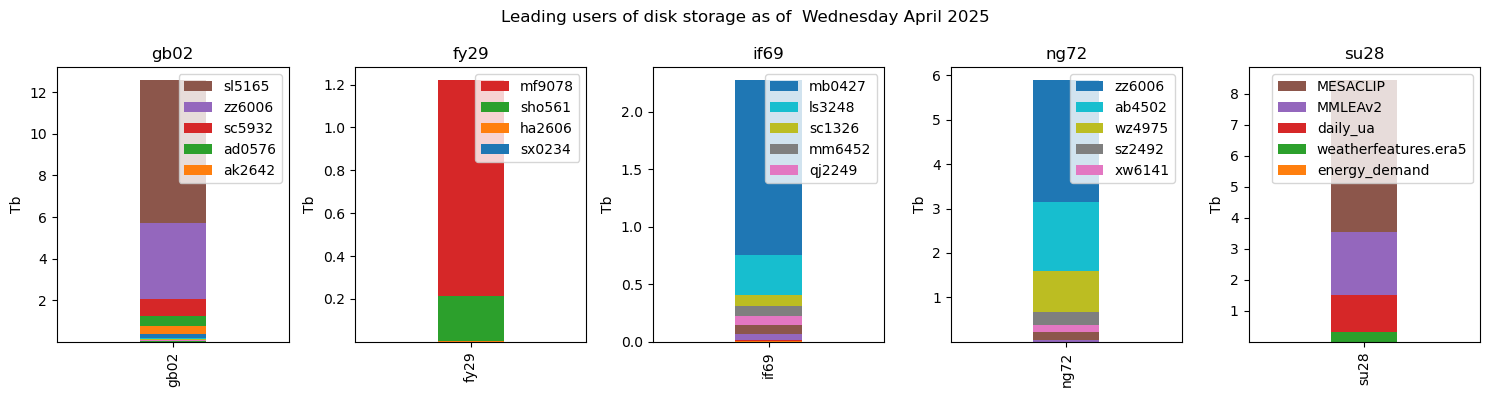

In [91]:
# Plot the five largest users for each project
fig,axes = plt.subplots(1,len(COE_PROJECTS),figsize=(15,4))

for i,project in enumerate(COE_PROJECTS):    
    (user_storage_numeric[project].to_frame().dropna().astype('int').sort_values(project)/1024/1e6).T.plot.bar(stacked=True,ax=axes[i],width=0.2)
    patches, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles=patches[-USER_NAMES:][::-1],labels=labels[-USER_NAMES:][::-1])
    axes[i].yaxis.set_label_text('Tb')
    axes[i].set_title(project)

fig.suptitle(f"Leading users of disk storage as of  {dt.datetime.today().strftime('%A %B %Y')}")
plt.tight_layout()